## Escolher a doença

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [8]:
diagnoses = pd.read_csv('C:/Users/rodri/Downloads/DIAGNOSES_ICD.csv')
d_icd = pd.read_csv('C:/Users/rodri/Downloads/D_ICD_DIAGNOSES.csv')
patients = pd.read_csv('C:/Users/rodri/Downloads/PATIENTS.csv')
chart_events = pd.read_csv('C:/Users/rodri/Downloads/CHARTEVENTS.csv')
lab_events = pd.read_csv('C:/Users/rodri/Downloads/LABEVENTS.csv')
admissions = pd.read_csv('C:/Users/rodri/Downloads/ADMISSIONS.csv')
icustays = pd.read_csv('C:/Users/rodri/Downloads/ICUSTAYS.csv')
inputevents_mv = pd.read_csv('C:/Users/rodri/Downloads/INPUTEVENTS_MV.csv')
inputevents_cv = pd.read_csv('C:/Users/rodri/Downloads/INPUTEVENTS_CV.csv')

C:\Users\rodri\AppData\Local\Temp\ipykernel_25716\2516767506.py:4: DtypeWarning: Columns (8,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  chart_events = pd.read_csv('C:/Users/rodri/Downloads/CHARTEVENTS.csv')
C:\Users\rodri\AppData\Local\Temp\ipykernel_25716\2516767506.py:9: DtypeWarning: Columns (7,9,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  inputevents_cv = pd.read_csv('C:/Users/rodri/Downloads/INPUTEVENTS_CV.csv')


In [3]:
patients = pd.read_csv('C:/Users/rodri/Downloads/PATIENTS.csv')

In [9]:
diagnoses_primary = diagnoses[diagnoses['SEQ_NUM'] == 1]

icd9_counts_primary = diagnoses_primary['ICD9_CODE'].value_counts()

icd9_counts_filtered = icd9_counts_primary[(icd9_counts_primary >= 400) & (icd9_counts_primary <= 800)]

print(icd9_counts_filtered)


ICD9_CODE
486      725
5070     659
4280     570
4240     568
430      529
5849     526
41041    482
41011    482
5789     446
Name: count, dtype: int64


In [10]:
#codigo da doença escolhida é 486
diagnoses_inf = diagnoses[diagnoses['ICD9_CODE'] == '486']

disease_info = d_icd[d_icd['ICD9_CODE'] == '486']  
print(disease_info[['ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE']])

count_seq1 = diagnoses_inf[diagnoses_inf['SEQ_NUM'] == 1].shape[0]
print(count_seq1)

     ICD9_CODE              SHORT_TITLE                       LONG_TITLE
5147       486  Pneumonia, organism NOS  Pneumonia, organism unspecified
725


Criar tabela com outras duas colunas da segnda e terceira doença

In [11]:
diagnoses_inf = diagnoses[(diagnoses['ICD9_CODE'] == '486') & (diagnoses['SEQ_NUM'] == 1)]

diagnoses_seq2 = diagnoses[diagnoses['SEQ_NUM'] == 2][['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']].rename(columns={'ICD9_CODE': 'ICD9_CODE_2'})
diagnoses_seq3 = diagnoses[diagnoses['SEQ_NUM'] == 3][['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']].rename(columns={'ICD9_CODE': 'ICD9_CODE_3'})

merged = diagnoses_inf.merge(diagnoses_seq2, on=['SUBJECT_ID', 'HADM_ID'], how='left')
merged = merged.merge(diagnoses_seq3, on=['SUBJECT_ID', 'HADM_ID'], how='left')

tabela = merged[['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE', 'ICD9_CODE_2', 'ICD9_CODE_3']]

print(tabela)
#aqui talvez fazer uma analise desta tabela, sobre o ICD9_CODE_2 e ICD9_CODE_3

     SUBJECT_ID  HADM_ID ICD9_CODE ICD9_CODE_2 ICD9_CODE_3
0           111   192123       486       49121        4139
1           242   192980       486         496       51889
2           346   195392       486       42731        4241
3           368   105889       486       49121       41071
4           370   123421       486       20410         496
..          ...      ...       ...         ...         ...
720       96244   186668       486       34831        5849
721       95895   145111       486       51881        2762
722       95895   179838       486       51884       49121
723       99937   129380       486        1120         515
724       96004   141589       486       51881        1623

[725 rows x 5 columns]


In [14]:
hadm_ids = tabela['HADM_ID'].unique()
subject_ids = tabela['SUBJECT_ID'].unique()

chart_events_filtered = chart_events[chart_events['HADM_ID'].isin(hadm_ids)]
lab_events_filtered = lab_events[lab_events['HADM_ID'].isin(hadm_ids)]
admissions_filtered = admissions[admissions['HADM_ID'].isin(hadm_ids)]
icustays_filtered = icustays[icustays['HADM_ID'].isin(hadm_ids)]
inputevents_mv_filtered = inputevents_mv[inputevents_mv['HADM_ID'].isin(hadm_ids)]
inputevents_cv_filtered = inputevents_cv[inputevents_cv['HADM_ID'].isin(hadm_ids)]
patients_filtered = patients[patients['SUBJECT_ID'].isin(subject_ids)]


chart_events_filtered.to_csv('chart_events_filtered.csv', index=False)
lab_events_filtered.to_csv('lab_events_filtered.csv', index=False)
admissions_filtered.to_csv('admissions_filtered.csv', index=False)
icustays_filtered.to_csv('icustays_filtered.csv', index=False)
inputevents_mv_filtered.to_csv('inputevents_mv_filtered.csv', index=False)
inputevents_cv_filtered.to_csv('inputevents_cv_filtered.csv', index=False)
patients_filtered.to_csv('patients_filtered.csv', index=False)


In [15]:
#download das tabelas filtradas, usar sempre a partir daqui
chart_events = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/chart_events_filtered.csv')
lab_events = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/lab_events_filtered.csv')
admissions = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/admissions_filtered.csv')
icustays = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/icustays_filtered.csv')
inputevents_cv = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/inputevents_cv_filtered.csv')
inputevents_mv = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/inputevents_mv_filtered.csv')
items = pd.read_csv('C:/Users/rodri/Downloads/D_ITEMS.csv')
labitems = pd.read_csv('C:/Users/rodri/Downloads/D_LABITEMS.csv')
patients = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/patients_filtered.csv')


C:\Users\rodri\AppData\Local\Temp\ipykernel_25716\2587047006.py:2: DtypeWarning: Columns (8,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  chart_events = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/chart_events_filtered.csv')
C:\Users\rodri\AppData\Local\Temp\ipykernel_25716\2587047006.py:6: DtypeWarning: Columns (9,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  inputevents_cv = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/inputevents_cv_filtered.csv')


## Análise geral da doença

### Icustays

=== STATISTICAL SUMMARY ===
Total ICU admissions: 763
Intensive care units represented: 5

Length of Stay distribution (days):
count    763.000000
mean       3.861453
std        4.755012
min        0.027951
25%        1.211753
50%        2.141609
75%        4.270422
max       41.557639
Name: LOS, dtype: float64


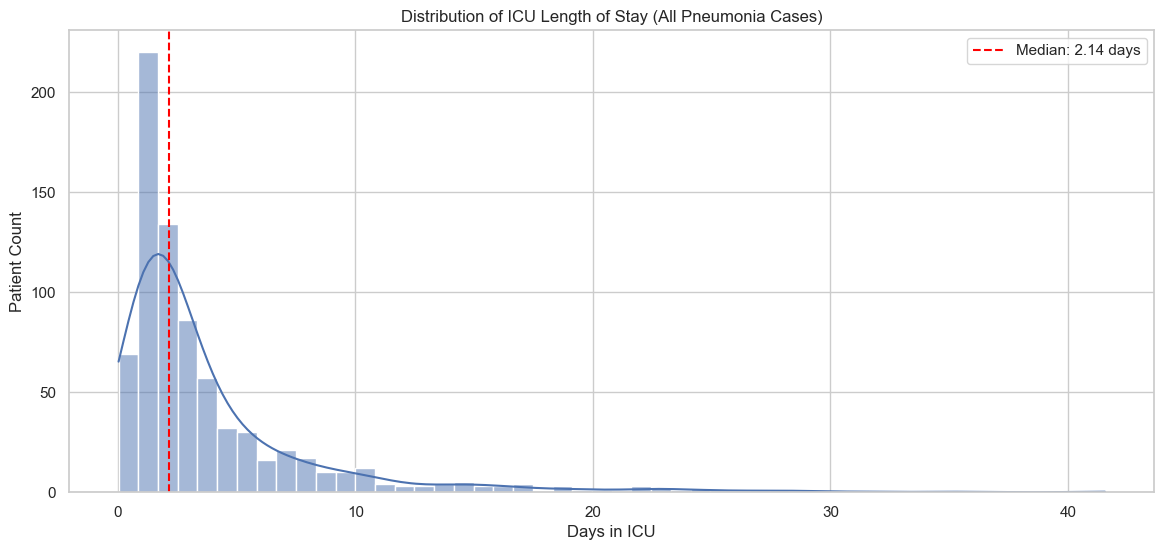

In [27]:
#icustays
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

icustays['INTIME'] = pd.to_datetime(icustays['INTIME'])
icustays['OUTTIME'] = pd.to_datetime(icustays['OUTTIME'])
icustays['LOS'] = (icustays['OUTTIME'] - icustays['INTIME']).dt.total_seconds() / 3600 / 24  # in days

# Basic Descriptive Analysis
print("=== STATISTICAL SUMMARY ===")
print(f"Total ICU admissions: {len(icustays)}")
print(f"Intensive care units represented: {icustays['LAST_CAREUNIT'].nunique()}")
print("\nLength of Stay distribution (days):")
print(icustays['LOS'].describe())

# LOS Distribution Visualization
plt.figure(figsize=(14, 6))
sns.histplot(data=icustays, x='LOS', bins=50, kde=True)
plt.title('Distribution of ICU Length of Stay (All Pneumonia Cases)')
plt.xlabel('Days in ICU')
plt.ylabel('Patient Count')
plt.axvline(x=icustays['LOS'].median(), color='red', linestyle='--', label=f'Median: {icustays["LOS"].median():.2f} days')
plt.legend()
plt.show()

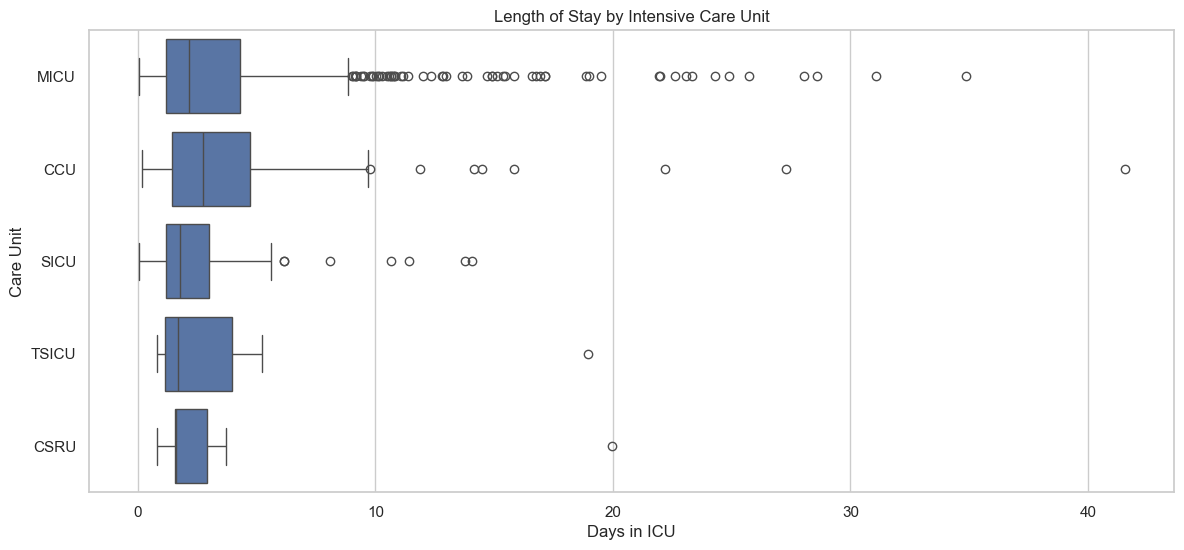

In [28]:
# Analysis by Care Unit
plt.figure(figsize=(14, 6))
sns.boxplot(data=icustays, x='LOS', y='LAST_CAREUNIT', order=icustays['LAST_CAREUNIT'].value_counts().index)
plt.title('Length of Stay by Intensive Care Unit')
plt.xlabel('Days in ICU')
plt.ylabel('Care Unit')
plt.show()

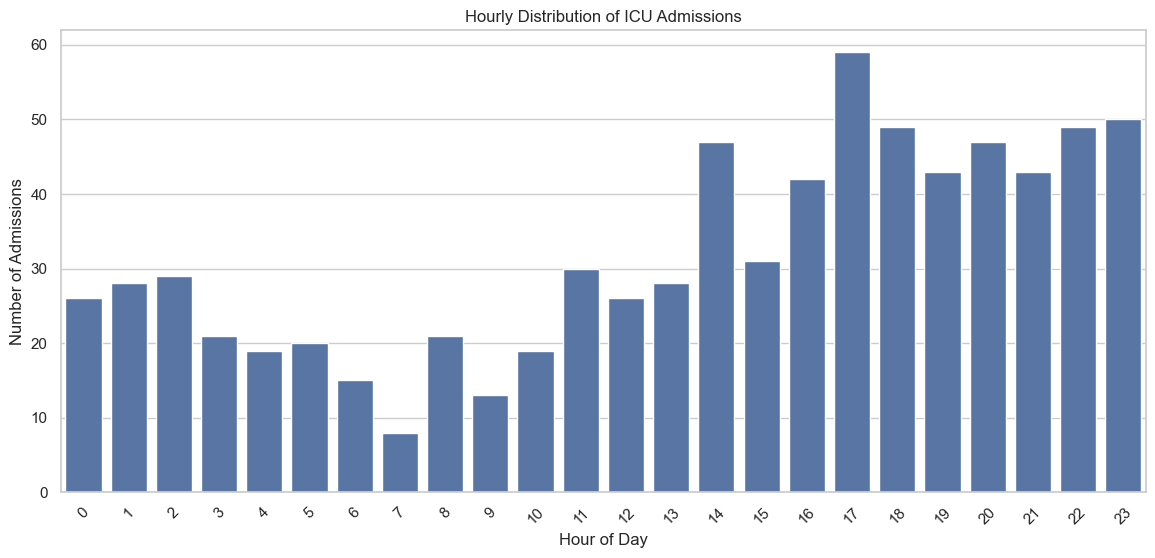

In [29]:
# Temporal Pattern of Admissions
icustays['ADMIT_HOUR'] = icustays['INTIME'].dt.hour
plt.figure(figsize=(14, 6))
sns.countplot(data=icustays, x='ADMIT_HOUR')
plt.title('Hourly Distribution of ICU Admissions')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.show()

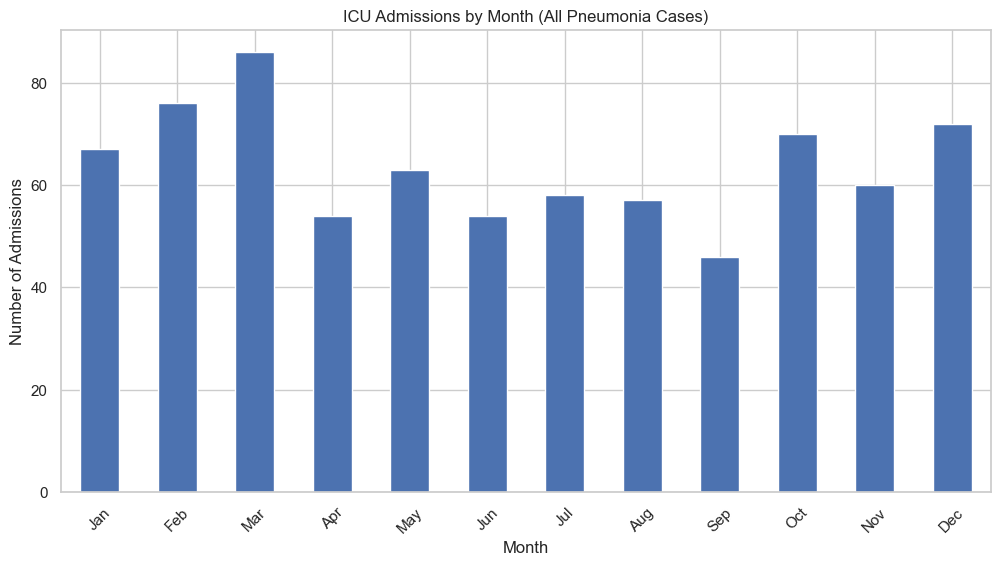

In [30]:
# Seasonality Analysis
icustays['ADMIT_MONTH'] = icustays['INTIME'].dt.month
monthly_admits = icustays['ADMIT_MONTH'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_admits.plot(kind='bar')
plt.title('ICU Admissions by Month (All Pneumonia Cases)')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

### Input events

=== INPUT EVENTS ANALYSIS ===
Total medication administrations: 191,503
Unique medication items: 273

Top 10 most administered items:
   ITEMID              LABEL  COUNT
0   30018  .9% Normal Saline  32897
1   30013                D5W  18745
2   30118           Fentanyl  13526
3   30124          Midazolam   8594
4   30131           Propofol   7534
5   30045            Insulin   6872
6  225158          NaCl 0.9%   6084
7  220949        Dextrose 5%   5303
8   30025            Heparin   4933
9   30141             Ativan   4927


C:\Users\rodri\AppData\Local\Temp\ipykernel_22172\1841494319.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


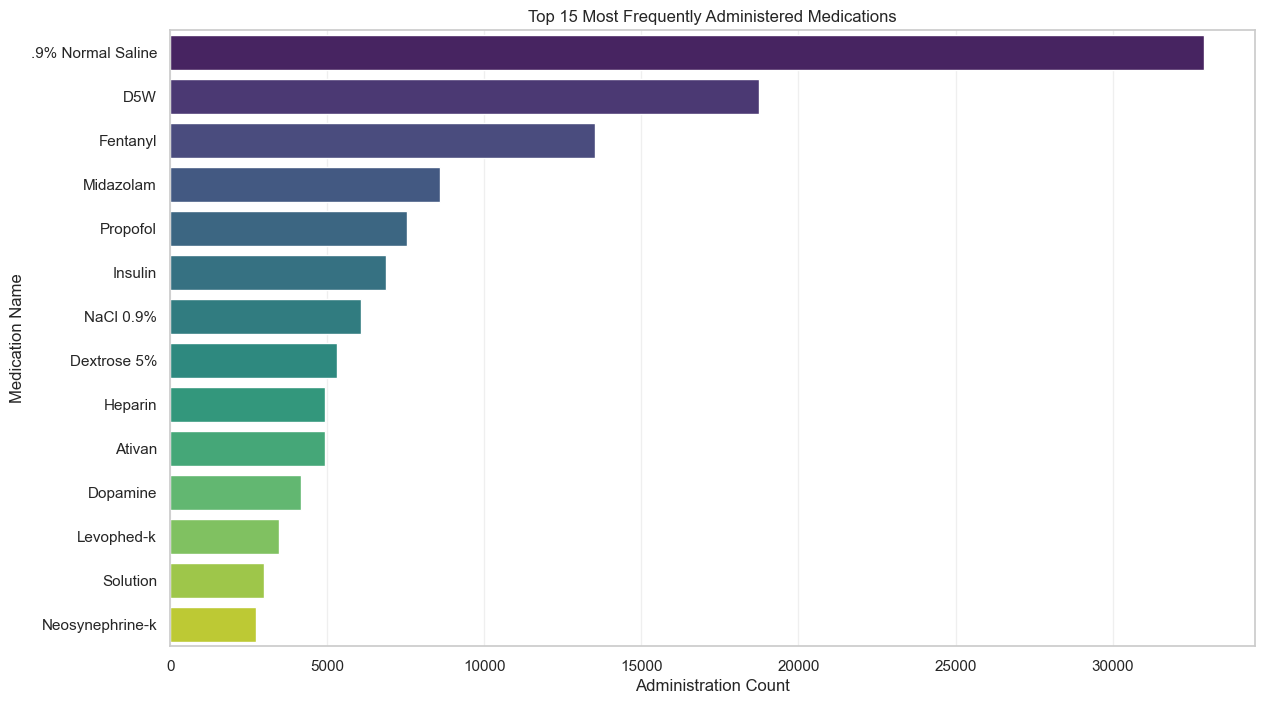

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [14, 8]

# Merge input events with medication names
input_events = pd.concat([inputevents_cv, inputevents_mv]).merge(
    items[['ITEMID', 'LABEL']].drop_duplicates(), 
    on='ITEMID', 
    how='left'
)

# Convert timestamps
input_events['CHARTTIME'] = pd.to_datetime(input_events['CHARTTIME'])
input_events['STARTTIME'] = pd.to_datetime(input_events['STARTTIME'])
input_events['time'] = input_events['CHARTTIME'].fillna(input_events['STARTTIME'])

# Basic Descriptive Analysis
print("=== INPUT EVENTS ANALYSIS ===")
print(f"Total medication administrations: {len(input_events):,}")
print(f"Unique medication items: {input_events['ITEMID'].nunique()}")
print("\nTop 10 most administered items:")

# Get top items with counts and labels - CORRECTED APPROACH
top_items = (input_events['ITEMID'].value_counts()
            .reset_index(name='COUNT')
            .rename(columns={'index': 'ITEMID'})
            .head(10))

top_items_with_labels = top_items.merge(
    items[['ITEMID', 'LABEL']].drop_duplicates(),
    on='ITEMID',
    how='left'
)

print(top_items_with_labels[['ITEMID', 'LABEL', 'COUNT']])


# Medication Type Analysis with Labels
top_item_ids = input_events['ITEMID'].value_counts().head(15).index
top_items_with_labels = input_events[input_events['ITEMID'].isin(top_item_ids)]

plt.figure(figsize=(14, 8))
sns.countplot(
    data=top_items_with_labels,
    y='LABEL',
    order=top_items_with_labels['LABEL'].value_counts().index,
    palette='viridis'
)
plt.title('Top 15 Most Frequently Administered Medications')
plt.xlabel('Administration Count')
plt.ylabel('Medication Name')
plt.grid(True, axis='x', alpha=0.3)
plt.show()

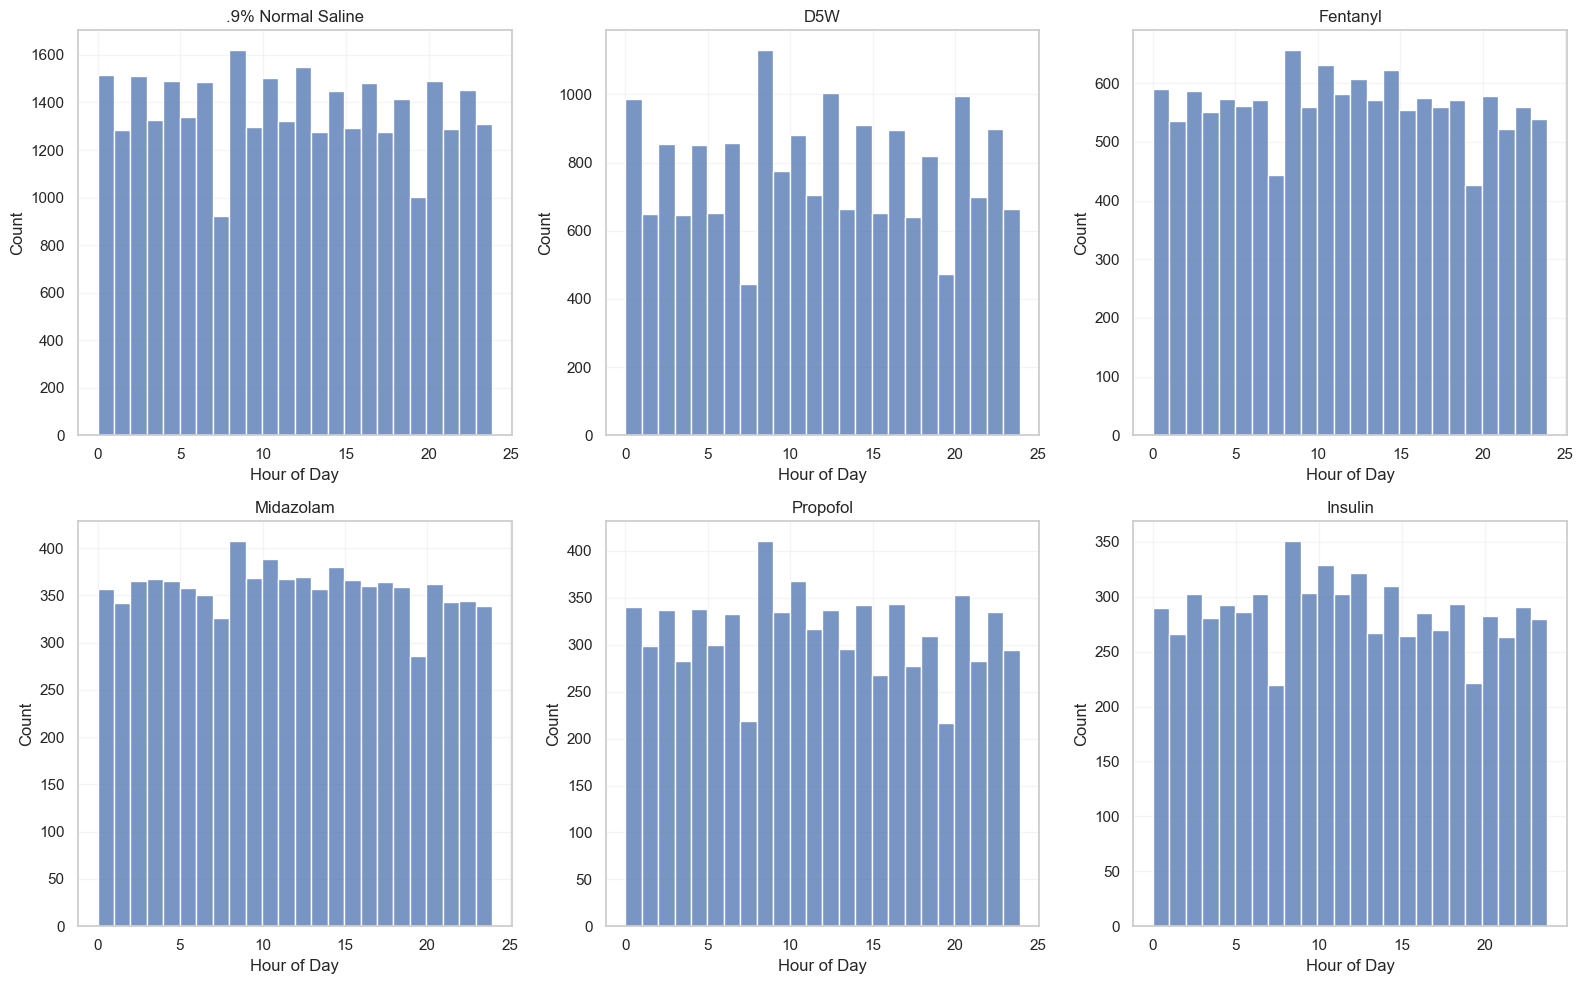

In [42]:
# Administration Patterns by Medication Name
plt.figure(figsize=(16, 10))
top_6_labels = top_items_with_labels['LABEL'].value_counts().index[:6]

for i, item_label in enumerate(top_6_labels):
    plt.subplot(2, 3, i+1)
    item_data = top_items_with_labels[top_items_with_labels['LABEL'] == item_label]
    sns.histplot(data=item_data, x='hour', bins=24)
    plt.title(f'{item_label[:30]}' + ('...' if len(item_label) > 30 else ''))
    plt.xlabel('Hour of Day')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.2)
    
plt.tight_layout()
plt.show()

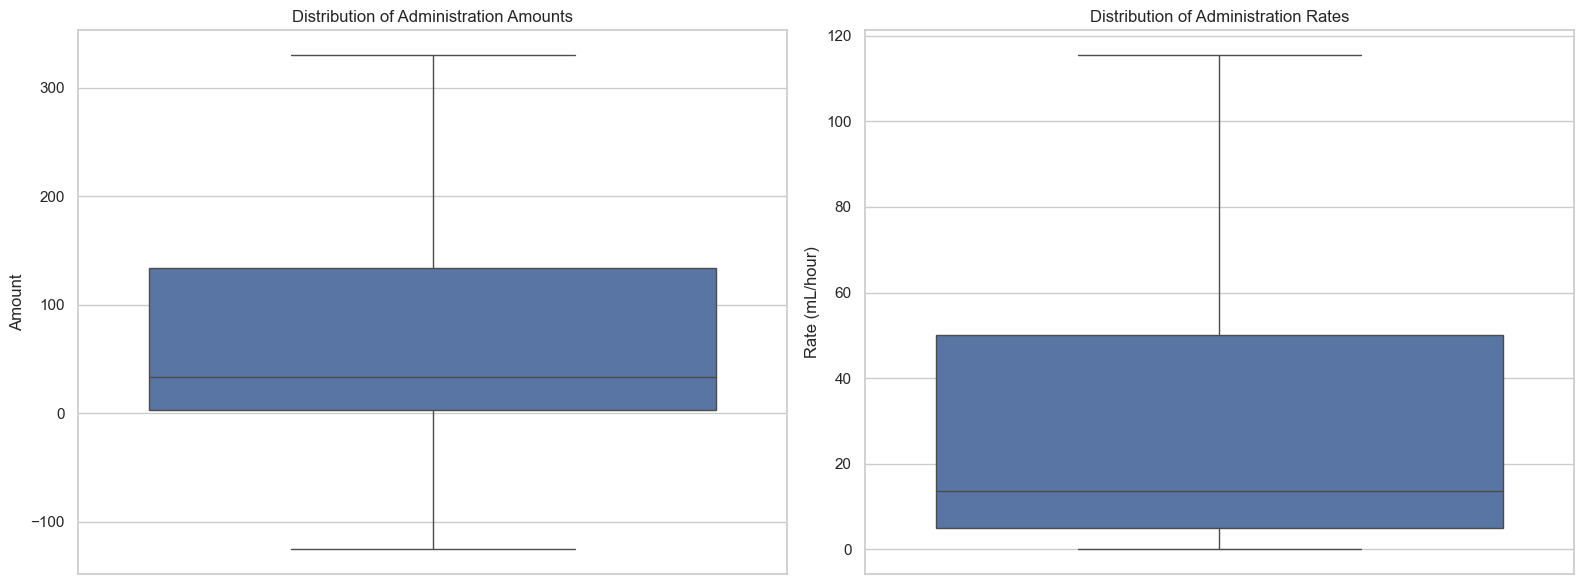

In [43]:
# Rate and Amount Analysis (if columns exist)
if all(col in input_events.columns for col in ['RATE', 'AMOUNT']):
    numeric_events = input_events.dropna(subset=['RATE', 'AMOUNT'])
    
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=numeric_events, y='AMOUNT', showfliers=False)
    plt.title('Distribution of Administration Amounts')
    plt.ylabel('Amount')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=numeric_events, y='RATE', showfliers=False)
    plt.title('Distribution of Administration Rates')
    plt.ylabel('Rate (mL/hour)')
    plt.tight_layout()
    plt.show()

### lab events

=== LAB EVENTS ANALYSIS ===
Total lab tests performed: 278,197
Unique lab test items: 475

Top 10 most frequent lab tests:
   ITEMID           LABEL    CATEGORY  COUNT
0   50971       Potassium   Chemistry   8390
1   50983          Sodium   Chemistry   8139
2   50902        Chloride   Chemistry   8050
3   50912      Creatinine   Chemistry   8026
4   51006   Urea Nitrogen   Chemistry   8013
5   50882     Bicarbonate   Chemistry   7986
6   51221      Hematocrit  Hematology   7970
7   50868       Anion Gap   Chemistry   7959
8   50931         Glucose   Chemistry   7900
9   51265  Platelet Count  Hematology   7419


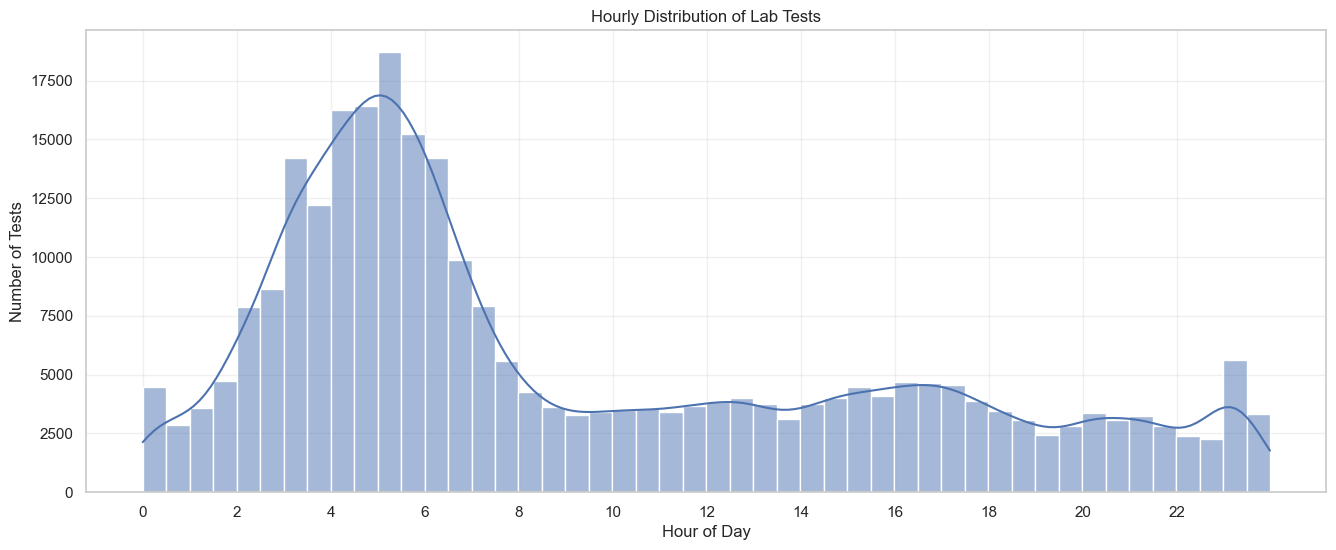

In [49]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [14, 8]

labevents = lab_events.merge(
    labitems[['ITEMID', 'LABEL', 'FLUID', 'CATEGORY']].drop_duplicates(),
    on='ITEMID',
    how='left'
)

# Convert timestamps (adjust column names as needed)
if 'CHARTTIME' in labevents.columns:
    labevents['CHARTTIME'] = pd.to_datetime(labevents['CHARTTIME'])
    labevents['time'] = labevents['CHARTTIME']

# Basic Descriptive Analysis
print("=== LAB EVENTS ANALYSIS ===")
print(f"Total lab tests performed: {len(labevents):,}")
print(f"Unique lab test items: {labevents['ITEMID'].nunique()}")
print("\nTop 10 most frequent lab tests:")

# Get top lab tests with counts and labels
top_labtests = (labevents['ITEMID'].value_counts()
               .reset_index(name='COUNT')
               .rename(columns={'index': 'ITEMID'})
               .head(10)
               .merge(labitems[['ITEMID', 'LABEL', 'CATEGORY']].drop_duplicates(),
                    on='ITEMID',
                    how='left'))

print(top_labtests[['ITEMID', 'LABEL', 'CATEGORY', 'COUNT']])

# Temporal Distribution Analysis
if 'time' in labevents.columns:
    labevents['hour'] = labevents['time'].dt.hour + labevents['time'].dt.minute/60
    
    plt.figure(figsize=(16, 6))
    sns.histplot(data=labevents, x='hour', bins=48, kde=True)
    plt.title('Hourly Distribution of Lab Tests')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Tests')
    plt.xticks(np.arange(0, 24, 2))
    plt.grid(True, alpha=0.3)
    plt.show()


C:\Users\rodri\AppData\Local\Temp\ipykernel_22172\3504466910.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


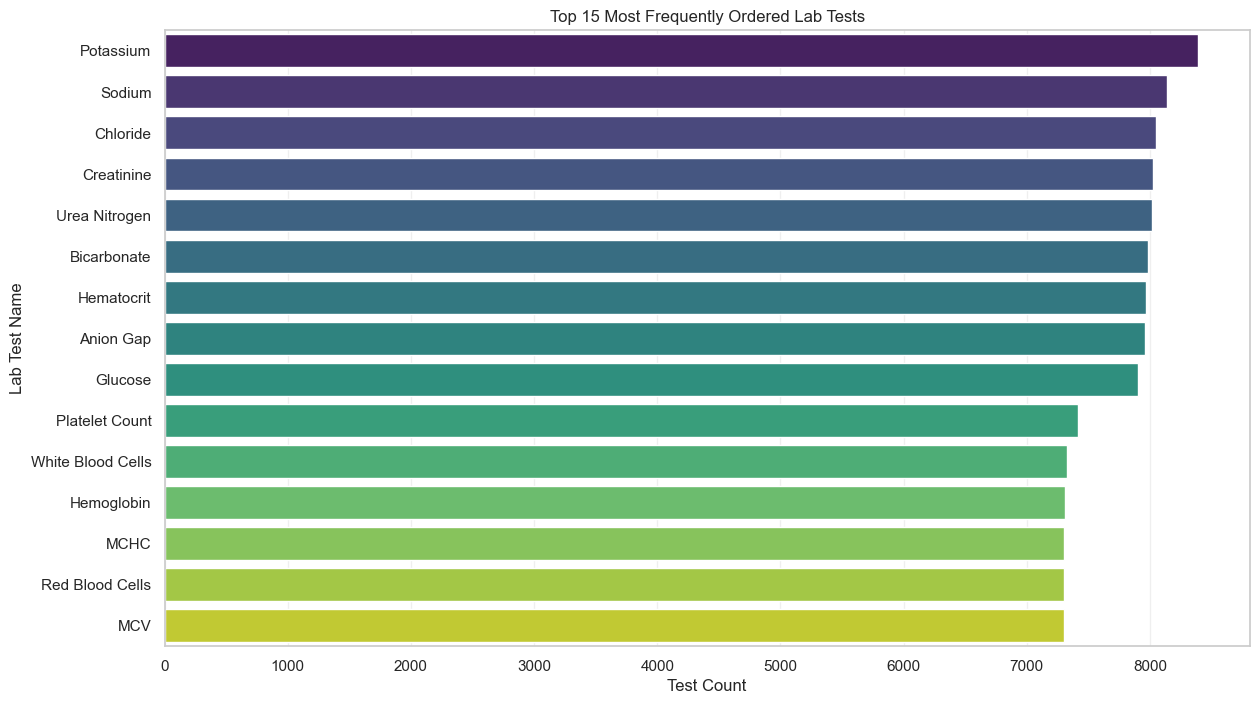

In [50]:
# Lab Test Type Analysis with Labels
top_labtest_ids = labevents['ITEMID'].value_counts().head(15).index
top_labtests_with_labels = labevents[labevents['ITEMID'].isin(top_labtest_ids)]

plt.figure(figsize=(14, 8))
sns.countplot(
    data=top_labtests_with_labels,
    y='LABEL',
    order=top_labtests_with_labels['LABEL'].value_counts().index,
    palette='viridis'
)
plt.title('Top 15 Most Frequently Ordered Lab Tests')
plt.xlabel('Test Count')
plt.ylabel('Lab Test Name')
plt.grid(True, axis='x', alpha=0.3)
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_22172\2607270047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


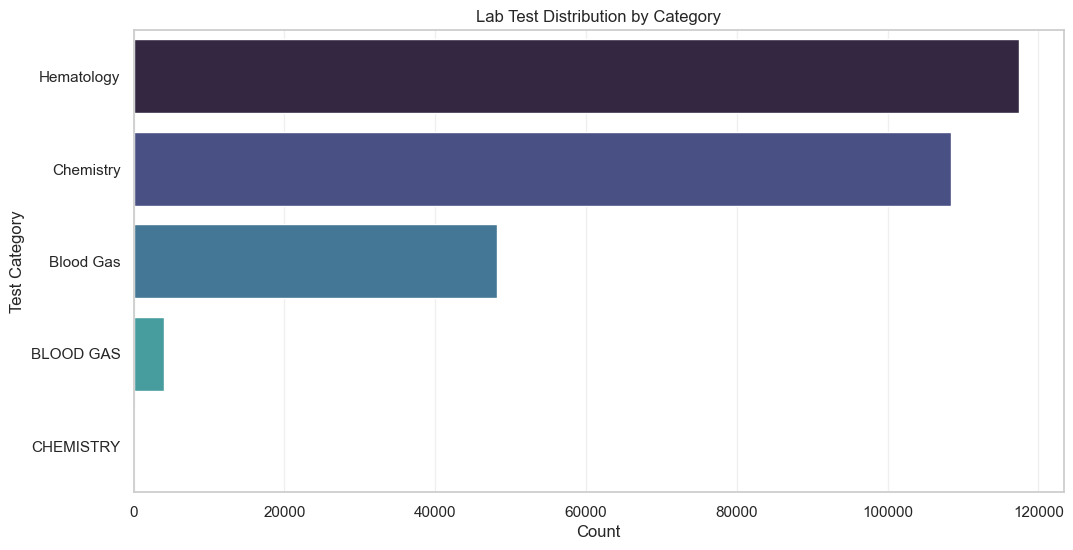

In [51]:
# Analysis by Test Category
plt.figure(figsize=(12, 6))
sns.countplot(
    data=labevents,
    y='CATEGORY',
    order=labevents['CATEGORY'].value_counts().index,
    palette='mako'
)
plt.title('Lab Test Distribution by Category')
plt.xlabel('Count')
plt.ylabel('Test Category')
plt.grid(True, axis='x', alpha=0.3)
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_22172\324611983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


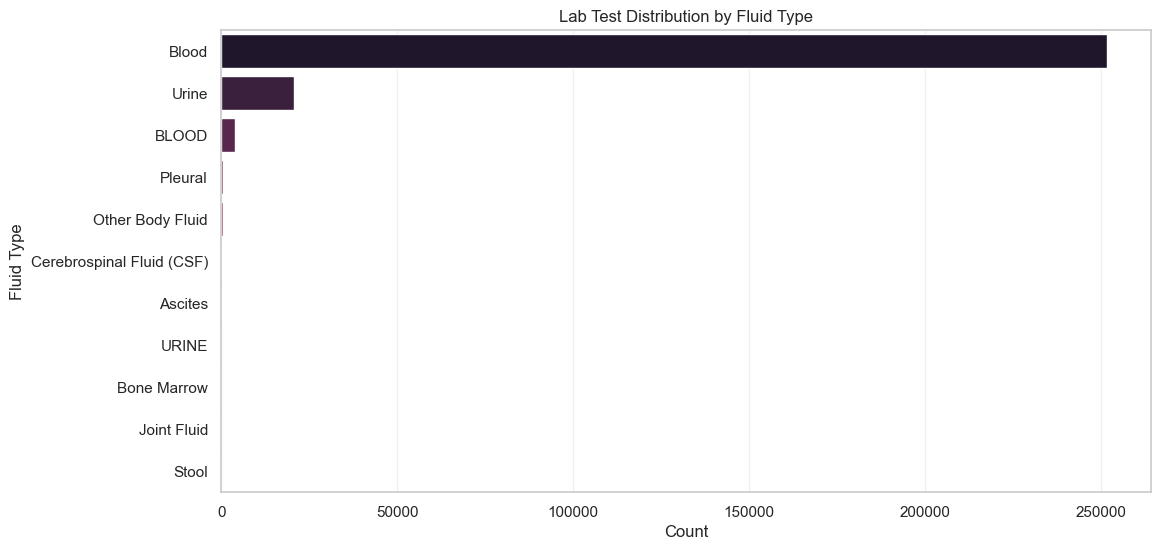

In [52]:
# Analysis by Fluid Type
if 'FLUID' in labevents.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=labevents,
        y='FLUID',
        order=labevents['FLUID'].value_counts().index,
        palette='rocket'
    )
    plt.title('Lab Test Distribution by Fluid Type')
    plt.xlabel('Count')
    plt.ylabel('Fluid Type')
    plt.grid(True, axis='x', alpha=0.3)
    plt.show()

agora seria fazer:

 -uma analise estatistica de cada paciente (sao muitos, entao provavelmente so de alguns)

 -machine learning para a variavel LOS no tabela icustays, mas as variáveis que importam estão no chart_events, inputevents_cv e inputevents_mv

C:\Users\rodri\AppData\Local\Temp\ipykernel_22172\2627215745.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_col] = pd.to_datetime(df[time_col])
C:\Users\rodri\AppData\Local\Temp\ipykernel_22172\2627215745.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours_since_start'] = (df[time_col] - df[time_col].min()).dt.total_seconds() / 3600


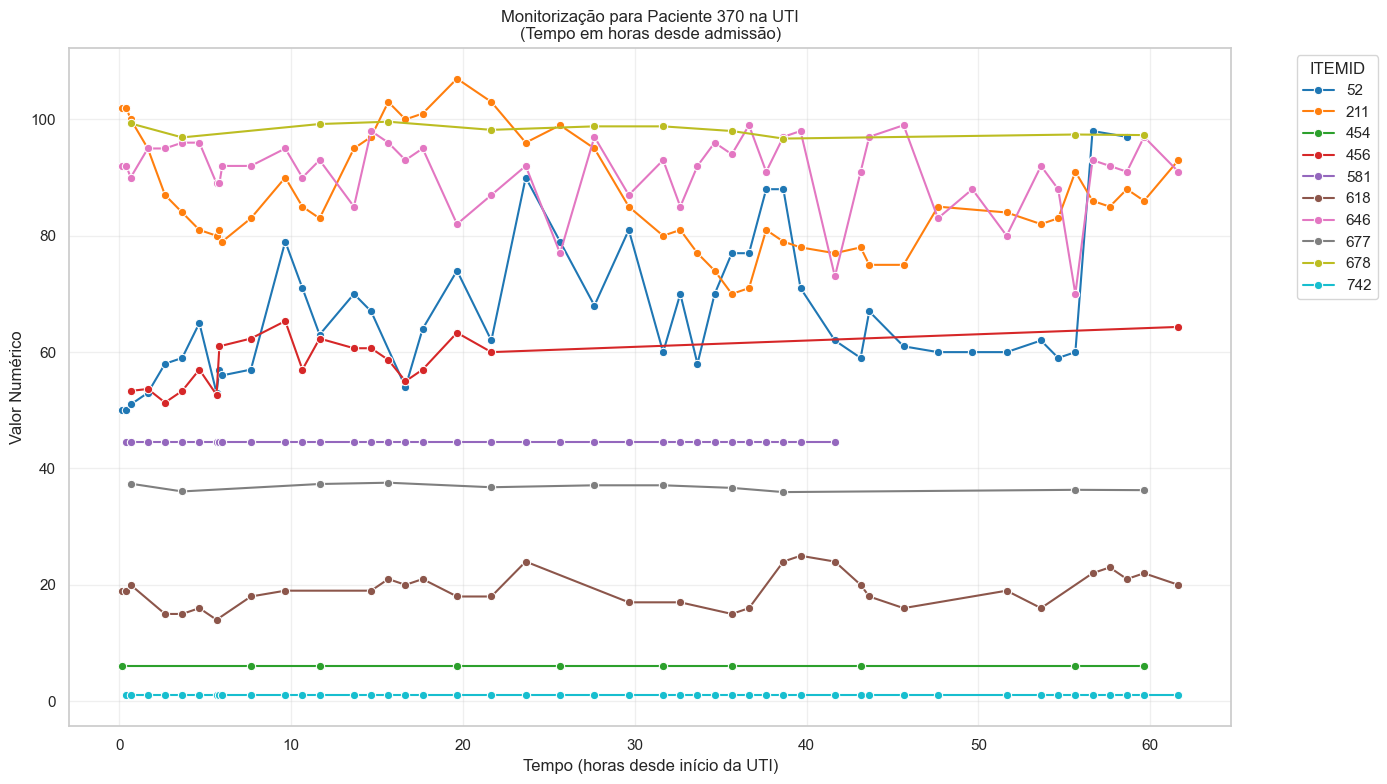

In [9]:
#analise do paciente 804 
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [14, 8]

subject_id = 370
hadm_id = 123421
icustay_id = 228402

def convert_time_hours(df, time_col):
    df[time_col] = pd.to_datetime(df[time_col])
    df['hours_since_start'] = (df[time_col] - df[time_col].min()).dt.total_seconds() / 3600
    return df

charts = chart_events[
    (chart_events['SUBJECT_ID'] == subject_id) & 
    (chart_events['HADM_ID'] == hadm_id) & 
    (chart_events['ICUSTAY_ID'] == icustay_id)
]

if not charts.empty:
    charts = convert_time_hours(charts, 'CHARTTIME') 
    charts_numeric = charts.dropna(subset=['VALUENUM'])
    
    # Selecionar os 10 itens mais frequentes
    top_items = charts_numeric['ITEMID'].value_counts().head(10).index
    charts_top = charts_numeric[charts_numeric['ITEMID'].isin(top_items)]
    
    plt.figure(figsize=(14, 8))
    sns.lineplot(
        data=charts_top, 
        x='hours_since_start', 
        y='VALUENUM', 
        hue='ITEMID', 
        palette='tab10',
        marker='o'
    )
    plt.title(f'Monitorização para Paciente {subject_id} na UTI\n(Tempo em horas desde admissão)')
    plt.xlabel('Tempo (horas desde início da UTI)')
    plt.ylabel('Valor Numérico')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='ITEMID')
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print("Nenhum dado encontrado para esse paciente.")

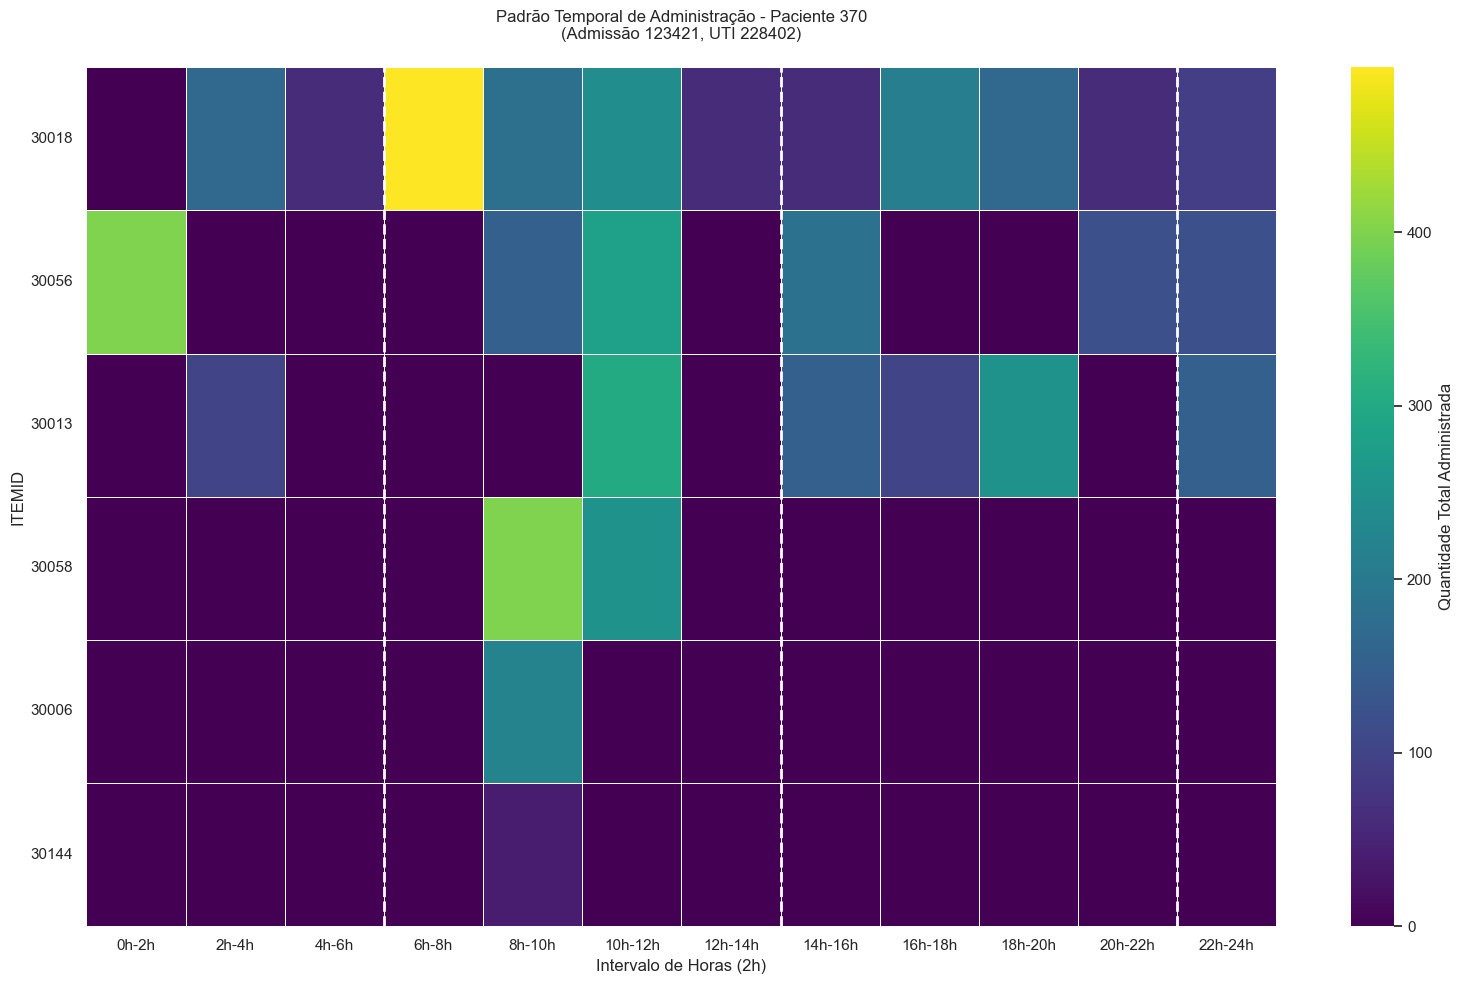


Itens administrados por turno:
shift   Manhã (0-8h)  Tarde (8-16h)  Noite (16-24h)
ITEMID                                             
30006            0.0          221.0             0.0
30013          100.0          550.0           400.0
30018          870.0          600.0           315.0
30056          150.0          465.0           240.0
30058          400.0          250.0             0.0
30144           40.0            0.0             0.0


C:\Users\rodri\AppData\Local\Temp\ipykernel_22172\2867284421.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(input_events.groupby(['ITEMID', 'shift'])['AMOUNT'].sum().unstack().fillna(0))


In [10]:
def convert_time(df, time_col):
    df[time_col] = pd.to_datetime(df[time_col])
    df['hour'] = df[time_col].dt.hour + df[time_col].dt.minute/60
    return df

input_events = pd.concat([
    inputevents_cv[
        (inputevents_cv['SUBJECT_ID'] == subject_id) & 
        (inputevents_cv['HADM_ID'] == hadm_id) & 
        (inputevents_cv['ICUSTAY_ID'] == icustay_id)
    ],
    inputevents_mv[
        (inputevents_mv['SUBJECT_ID'] == subject_id) & 
        (inputevents_mv['HADM_ID'] == hadm_id) & 
        (inputevents_mv['ICUSTAY_ID'] == icustay_id)
    ]
])

if not input_events.empty:
    input_events = convert_time(input_events, 'CHARTTIME' if 'CHARTTIME' in input_events.columns else 'STARTTIME')
    
    input_events['hour_bin'] = (input_events['hour'] // 2) * 2
    
    heatmap_data = input_events.pivot_table(
        index='ITEMID',
        columns='hour_bin',
        values='AMOUNT',
        aggfunc='sum',
        fill_value=0
    )
    
    heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]
    
    hour_bins = sorted(input_events['hour_bin'].unique())
    hour_labels = [f"{int(h)}h-{int(h)+2}h" for h in hour_bins]
    
    plt.figure(figsize=(16, 10))
    sns.heatmap(
        heatmap_data,
        cmap='viridis',
        cbar_kws={'label': 'Quantidade Total Administrada'},
        linewidths=0.5,
        xticklabels=hour_labels
    )
    
    plt.title(f'Padrão Temporal de Administração - Paciente {subject_id}\n(Admissão {hadm_id}, UTI {icustay_id})', pad=20)
    plt.xlabel('Intervalo de Horas (2h)')
    plt.ylabel('ITEMID')
    plt.yticks(rotation=0)
    
    for shift in [8, 16, 24]:
        bin_position = (shift // 2) - 1
        if bin_position < len(hour_bins):
            plt.axvline(x=bin_position, color='white', linestyle='--', linewidth=2)
    
    plt.tight_layout()
    plt.show()
    
    # Estatísticas por turno
    print("\nItens administrados por turno:")
    input_events['shift'] = pd.cut(input_events['hour'], 
                                 bins=[0, 8, 16, 24], 
                                 labels=['Manhã (0-8h)', 'Tarde (8-16h)', 'Noite (16-24h)'])
    print(input_events.groupby(['ITEMID', 'shift'])['AMOUNT'].sum().unstack().fillna(0))
else:
    print("Nenhum dado de administração encontrado para este paciente.")

## Modelo (prever lenght of stay)

features:

-top 50 items usados e o top 50 menos usados (os testes mais normais, ou seja, que se fazem hora a hora, fazer media do dia) (chart_events) x

-idade/data de nascimento (tabela dos patients) x

-icd_code2 e 3 (tabela_codigos) x

-dosagem como os items têm diferentes medidas é preciso padronizar isso (chart_events)

In [35]:
diagnoses = pd.read_csv('C:/Users/rodri/Downloads/DIAGNOSES_ICD.csv')
diagnoses_inf = diagnoses[(diagnoses['ICD9_CODE'] == '486') & (diagnoses['SEQ_NUM'] == 1)]

diagnoses_seq2 = diagnoses[diagnoses['SEQ_NUM'] == 2][['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']].rename(columns={'ICD9_CODE': 'ICD9_CODE_2'})
diagnoses_seq3 = diagnoses[diagnoses['SEQ_NUM'] == 3][['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']].rename(columns={'ICD9_CODE': 'ICD9_CODE_3'})

merged = diagnoses_inf.merge(diagnoses_seq2, on=['SUBJECT_ID', 'HADM_ID'], how='left')
merged = merged.merge(diagnoses_seq3, on=['SUBJECT_ID', 'HADM_ID'], how='left')

tabela_codigos = merged[['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE', 'ICD9_CODE_2', 'ICD9_CODE_3']]

print(tabela_codigos)

     SUBJECT_ID  HADM_ID ICD9_CODE ICD9_CODE_2 ICD9_CODE_3
0           111   192123       486       49121        4139
1           242   192980       486         496       51889
2           346   195392       486       42731        4241
3           368   105889       486       49121       41071
4           370   123421       486       20410         496
..          ...      ...       ...         ...         ...
720       96244   186668       486       34831        5849
721       95895   145111       486       51881        2762
722       95895   179838       486       51884       49121
723       99937   129380       486        1120         515
724       96004   141589       486       51881        1623

[725 rows x 5 columns]


In [85]:
#top 50 items e top 50 menos usados
hadm_ids = icustays_filtered['HADM_ID'].unique()

item_usage_counts = (
    chart_events_filtered[['HADM_ID', 'ITEMID']]
    .drop_duplicates()
    .groupby('ITEMID')
    .size()
    .sort_values(ascending=False)
)

# Selecionar top e bottom 50 com base nisso
top_50_items = item_usage_counts.head(50).index.tolist()
bottom_50_items = item_usage_counts.tail(50).index.tolist()
selected_items = top_50_items + bottom_50_items

filtered = chart_events_filtered[
    (chart_events_filtered['ITEMID'].isin(selected_items)) &
    (chart_events_filtered['HADM_ID'].isin(hadm_ids))
].copy()

filtered['USED'] = 1

# Criar pivot table: uma linha por HADM_ID, colunas binárias para os itens
pivot = (
    filtered
    .groupby(['HADM_ID', 'ITEMID'])['USED']
    .max()
    .unstack(fill_value=0)
)


pivot = pivot.reindex(columns=selected_items, fill_value=0)
pivot = pivot.reindex(index=hadm_ids, fill_value=0)


pivot = pivot.reset_index()

#Adicionar SUBJECT_ID e LOS 
pivot = pivot.merge(
    icustays_filtered[['HADM_ID', 'SUBJECT_ID', 'LOS']],
    on='HADM_ID',
    how='left'
)

print(pivot.shape)  
print(pivot.head())

(763, 103)
   HADM_ID  220645  225624  227073  220615  220621  220602  220545  227442  \
0   195392       0       0       0       0       0       0       0       0   
1   192123       0       0       0       0       0       0       0       0   
2   192980       0       0       0       0       0       0       0       0   
3   117876       1       1       1       1       1       1       1       1   
4   105889       0       0       0       0       0       0       0       0   

   227443  ...  228369  228370  228374  228375  228376  228377  228381  \
0       0  ...       0       0       0       0       0       0       0   
1       0  ...       0       0       0       0       0       0       0   
2       0  ...       0       0       0       0       0       0       0   
3       1  ...       0       0       0       0       0       0       0   
4       0  ...       0       0       0       0       0       0       0   

   228382  SUBJECT_ID      LOS  
0       0         346   4.8545  
1       0

In [86]:
#dosagens
# Calcular médias de dose por HADM_ID e ITEMID
dosage_means = (
    chart_events_filtered
    .dropna(subset=['VALUENUM']) 
    .groupby(['HADM_ID', 'ITEMID'])['VALUENUM']
    .mean()
    .unstack()
)

dosage_means = dosage_means.reindex(columns=selected_items, fill_value=0)
dosage_means = dosage_means.add_prefix('MEAN_DOSE_')
dosage_means = dosage_means.reset_index()
pivot = pivot.merge(dosage_means, on='HADM_ID', how='left')

dose_columns = [col for col in pivot.columns if isinstance(col, str) and col.startswith('MEAN_DOSE_')]
pivot[dose_columns] = pivot[dose_columns].fillna(0)

if 'LOS' not in pivot.columns:
    pivot = pivot.merge(
        icustays_filtered[['HADM_ID', 'LOS']].drop_duplicates(subset='HADM_ID'),
        on='HADM_ID',
        how='left'
    )

print(pivot.shape)
print(pivot.head())

(763, 203)
   HADM_ID  220645  225624  227073  220615  220621  220602  220545  227442  \
0   195392       0       0       0       0       0       0       0       0   
1   192123       0       0       0       0       0       0       0       0   
2   192980       0       0       0       0       0       0       0       0   
3   117876       1       1       1       1       1       1       1       1   
4   105889       0       0       0       0       0       0       0       0   

   227443  ...  MEAN_DOSE_26  MEAN_DOSE_228368  MEAN_DOSE_228369  \
0       0  ...           0.0               0.0               0.0   
1       0  ...           0.0               0.0               0.0   
2       0  ...           0.0               0.0               0.0   
3       1  ...           0.0               0.0               0.0   
4       0  ...           0.0               0.0               0.0   

   MEAN_DOSE_228370  MEAN_DOSE_228374  MEAN_DOSE_228375  MEAN_DOSE_228376  \
0               0.0               

In [87]:
#ICD9_CODES
pivot = pivot.merge(
    tabela_codigos[['HADM_ID', 'ICD9_CODE_2', 'ICD9_CODE_3']],
    on='HADM_ID',
    how='left'  
)

print(pivot.shape) 
print(pivot.head())

(763, 205)
   HADM_ID  220645  225624  227073  220615  220621  220602  220545  227442  \
0   195392       0       0       0       0       0       0       0       0   
1   192123       0       0       0       0       0       0       0       0   
2   192980       0       0       0       0       0       0       0       0   
3   117876       1       1       1       1       1       1       1       1   
4   105889       0       0       0       0       0       0       0       0   

   227443  ...  MEAN_DOSE_228369  MEAN_DOSE_228370  MEAN_DOSE_228374  \
0       0  ...               0.0               0.0               0.0   
1       0  ...               0.0               0.0               0.0   
2       0  ...               0.0               0.0               0.0   
3       1  ...               0.0               0.0               0.0   
4       0  ...               0.0               0.0               0.0   

   MEAN_DOSE_228375  MEAN_DOSE_228376  MEAN_DOSE_228377  MEAN_DOSE_228381  \
0         

In [88]:
#age
intime_unique = icustays_filtered[['HADM_ID', 'INTIME']].drop_duplicates(subset='HADM_ID')
dob_unique = patients[['SUBJECT_ID', 'DOB']].drop_duplicates(subset='SUBJECT_ID')

# Merge INTIME com pivot (com base no HADM_ID)
pivot = pivot.merge(intime_unique, on='HADM_ID', how='left')

# Merge DOB com pivot (com base no SUBJECT_ID)
pivot = pivot.merge(dob_unique, on='SUBJECT_ID', how='left')

# Converter para datetime, tratando erros
pivot['DOB'] = pd.to_datetime(pivot['DOB'], errors='coerce')
pivot['INTIME'] = pd.to_datetime(pivot['INTIME'], errors='coerce')

# Calcular idade com base apenas no ano
pivot['AGE'] = pivot['INTIME'].dt.year - pivot['DOB'].dt.year

# Remover colunas temporárias (opcional)
pivot = pivot.drop(columns=['DOB', 'INTIME'])

# Verificar tamanho e amostra
print(pivot.shape) 
print(pivot.head())

(763, 206)
   HADM_ID  220645  225624  227073  220615  220621  220602  220545  227442  \
0   195392       0       0       0       0       0       0       0       0   
1   192123       0       0       0       0       0       0       0       0   
2   192980       0       0       0       0       0       0       0       0   
3   117876       1       1       1       1       1       1       1       1   
4   105889       0       0       0       0       0       0       0       0   

   227443  ...  MEAN_DOSE_228370  MEAN_DOSE_228374  MEAN_DOSE_228375  \
0       0  ...               0.0               0.0               0.0   
1       0  ...               0.0               0.0               0.0   
2       0  ...               0.0               0.0               0.0   
3       1  ...               0.0               0.0               0.0   
4       0  ...               0.0               0.0               0.0   

   MEAN_DOSE_228376  MEAN_DOSE_228377  MEAN_DOSE_228381  MEAN_DOSE_228382  \
0         

In [ ]:
print(pivot[pivot['AGE'] > 110])  #ha valores 300 mas é pelos dados mesmo(tirar duvida à stora)

     HADM_ID  220645  225624  227073  220615  220621  220602  220545  227442  \
4     105889       0       0       0       0       0       0       0       0   
8     123769       0       0       0       0       0       0       0       0   
64    184482       0       0       0       0       0       0       0       0   
67    138757       0       0       0       0       0       0       0       0   
86    106194       0       0       0       0       0       0       0       0   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
724   154468       1       1       1       1       1       1       1       1   
747   131430       1       1       1       1       1       1       1       1   
748   170376       1       1       1       1       1       1       1       1   
753   152925       1       1       1       1       1       1       1       1   
756   143249       1       1       1       1       1       1       1       1   

     227443  ...  MEAN_DOSE_228370  MEA

In [90]:
pivot.to_csv('C:/Users/rodri/Downloads/pivot.csv', index=False)

padronizar as dosagens agora